In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
data = pd.read_csv("dice_com-job_us_sample.csv")

In [3]:
data.head()

,advertiserurl,company,employmenttype_jobstatus,jobdescription,jobid,joblocation_address,jobtitle,postdate,shift,site_name,skills,uniq_id
0,https://www.dice.com/jobs/detail/AUTOMATION-TE...,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Dice Id : 10110693,"Atlanta, GA",AUTOMATION TEST ENGINEER,1 hour ago,Telecommuting not available|Travel not required,NaN,SEE BELOW,418ff92580b270ef4e7c14f0ddfc36b4
1,https://www.dice.com/jobs/detail/Information-S...,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Dice Id : 10114469,"Chicago, IL",Information Security Engineer,1 week ago,Telecommuting not available|Travel not required,NaN,"linux/unix, network monitoring, incident respo...",8aec88cba08d53da65ab99cf20f6f9d9
2,https://www.dice.com/jobs/detail/Business-Solu...,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Dice Id : CXGALXYS,"Schaumburg, IL",Business Solutions Architect,2 weeks ago,Telecommuting not available|Travel not required,NaN,"Enterprise Solutions Architecture, business in...",46baa1f69ac07779274bcd90b85d9a72
3,https://www.dice.com/jobs/detail/Java-Develope...,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Dice Id : 10113627,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",2 weeks ago,Telecommuting not available|Travel not required,NaN,Please see job description,3941b2f206ae0f900c4fba4ac0b18719
4,https://www.dice.com/jobs/detail/DevOps-Engine...,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Dice Id : matrixga,"Atlanta, GA",DevOps Engineer,48 minutes ago,Telecommuting not available|Travel not required,NaN,"Configuration Management, Developer, Linux, Ma...",45efa1f6bc65acc32bbbb953a1ed13b7


In [4]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   advertiserurl             22000 non-null  object
 1   company                   21950 non-null  object
 2   employmenttype_jobstatus  21770 non-null  object
 3   jobdescription            22000 non-null  object
 4   jobid                     22000 non-null  object
 5   joblocation_address       21997 non-null  object
 6   jobtitle                  22000 non-null  object
 7   postdate                  22000 non-null  object
 8   shift                     21643 non-null  object
 9   site_name                 3490 non-null   object
 10  skills                    21957 non-null  object
 11  uniq_id                   22000 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


In [5]:
data.isnull().sum()

advertiserurl                   0
company                        50
employmenttype_jobstatus      230
jobdescription                  0
jobid                           0
joblocation_address             3
jobtitle                        0
postdate                        0
shift                         357
site_name                   18510
skills                         43
uniq_id                         0
dtype: int64

In [6]:
data_cleaned = data.drop(columns=['advertiserurl', 'jobid', 'postdate', 'site_name', 'uniq_id'])

data_cleaned.columns

Index(['company', 'employmenttype_jobstatus', 'jobdescription',
       'joblocation_address', 'jobtitle', 'shift', 'skills'],
      dtype='object')

In [7]:
data_cleaned.isnull().sum()

company                      50
employmenttype_jobstatus    230
jobdescription                0
joblocation_address           3
jobtitle                      0
shift                       357
skills                       43
dtype: int64

In [8]:
columns_to_impute = ['company', 'employmenttype_jobstatus', 'joblocation_address', 'shift']

for column in columns_to_impute:
    mode_value = data_cleaned[column].mode()[0]  
    data_cleaned[column].fillna(mode_value, inplace=True)  

In [9]:
print("Missing values after mode imputation:")
print(data_cleaned.isnull().sum())

Missing values after mode imputation:
company                      0
employmenttype_jobstatus     0
jobdescription               0
joblocation_address          0
jobtitle                     0
shift                        0
skills                      43
dtype: int64


In [10]:
skills_data = data_cleaned['skills'].dropna()

all_skills = skills_data.str.split(',|\s+').apply(lambda x: [skill.strip() for skill in x if skill.strip() != ''])

flattened_skills = [skill for sublist in all_skills for skill in sublist]

unique_skills = list(set(flattened_skills))

print("Unique skills found in the 'skills' column:")
print(len(unique_skills))

Unique skills found in the 'skills' column:
21168


In [11]:
print(unique_skills[:200])

['RayPack', 'Richardson', '(VCP4', 'ethernet', 'Engagements', 'IDQ', 'Selenium/Java/CucumberAPI/SOAP/AGILE/ATDD/SQL', '"angular.js"', 'coax', 'HTML/JSP/Java', 'e', 'crm"', 'validity', 'avaya', 'Fload', 'SOAP/REST', 'unit-test', 'APIs.', 'MULE', 'Sphinx', 'Provide', 'mixer', 'DHTMLX', 'progressively', 'entry', '(NLP', 'JavaScript/JQuery', 'detail)', 'Sniffer)', 'technical', 'One', '(Workday/Oracle/PeopleSoft/SAP/SaaS', 'Browsers', 'Machine', 'CA-ESP', 'Athena', 'navi', 'launches', 'SFIN/Finance', '"High', 'ME)', 'Quant', 'EE7', 'ECMAscript6', 'isu', 'Yrs)', 'addressing', 'E-Learning.', 'HEALTH', 'Peopletools', 'GCE', 'Electronic', 'modules:', 'Emerson', 'Integration"', 'Plug-Ins', 'DOCKER', 'should', 'OVER', 'Unifi', 'team.', 'Income-rates', 'vpn', 'IPS', 'JAVA/J2EE', 'SDFC', 'HRMS', 'XMAL', 'PSFT', 'routing', 'ARTIST', 'level)', 'QNX', 'certification', 'petabytes', '-10', 'Recruiter', 'PB', 'JAX/RS', 'HPSA', 'VTK', 'Wizard', 'BladeLogic;Anti-Virus', 'BICS', '/Protocol', 'Groovy)', 'SOA

In [12]:
import re

def clean_skill(skill):
    cleaned_skill = re.sub(r'[\(\)\[\]\{\}]', '', skill) 
    cleaned_skill = re.sub(r'\bAND\b', '', cleaned_skill, flags=re.IGNORECASE) 
    return cleaned_skill.strip()  

cleaned_skills = [clean_skill(skill) for skill in unique_skills]

In [13]:
def extract_skills_from_description(description):
    found_skills = [skill for skill in cleaned_skills if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE)]
    return ', '.join(found_skills) if found_skills else None

for index, row in data_cleaned[data_cleaned['skills'].isnull()].iterrows():
    extracted_skills = extract_skills_from_description(row['jobdescription'])
    if extracted_skills:
        data_cleaned.at[index, 'skills'] = extracted_skills  

print("Missing values in 'skills' after extraction:")
print(data_cleaned['skills'].isnull().sum())

Missing values in 'skills' after extraction:
0


In [14]:
data_cleaned[data_cleaned['skills'].isnull() == False].head(286)

,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,shift,skills
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,Telecommuting not available|Travel not required,SEE BELOW
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo..."
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Telecommuting not available|Travel not required,Please see job description
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma..."
...,...,...,...,...,...,...,...
281,The Armada Group,"Contract Independent, 3+ mon CTH","As a Full Stack Software Engineer, you will co...","San Jose, CA",Full stack Software Engineer,Telecommuting not available|Travel not required,Skills and Experience required * Full-stack en...
282,"TAD PGS, Inc","Contract W2, 6 Months","TAD PGS, INC. is currently seeking a Software ...","Huntsville, AL",Software Specialist VI,Telecommuting not available|Travel not required,"TAD PGS, INC. specializes in delivering secure..."
283,TM Floyd,BASED ON EXPERIENCE,Server Analyst Responsibilities: Perform serve...,"Columbia, SC",Server Analyst,Telecommuting not available|Travel not required,"e, level, information, Bonus, details, impleme..."
284,Mitchell Martin,"Full Time, Full Time",Our client is seeking a Splunk Admin. Locati...,"Lake Success, NY",Splunk Admin,Telecommuting not available|Travel not required,"Capacity Planning, Configuration Management, C..."


In [15]:
description_rows = data_cleaned['skills'].str.contains(r'\bdescription\b', case=False, na=False)

num_description_rows = description_rows.sum()

print(f"Number of rows where 'skills' contains the word 'description': {num_description_rows}")

Number of rows where 'skills' contains the word 'description': 213


In [18]:
keywords = ['description', 'BELOW']

pattern = r'\b(' + '|'.join(keywords) + r')\b'

description_rows = data_cleaned['skills'].str.contains(pattern, case=False, na=False)

num_description_rows = description_rows.sum()

print(f"Number of rows where 'skills' contains the specified keywords: {num_description_rows}")


Number of rows where 'skills' contains the specified keywords: 244


C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_9472\4004364221.py:8: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  description_rows = data_cleaned['skills'].str.contains(pattern, case=False, na=False)


In [19]:
import re

# First, set 'skills' to None for rows containing the word 'description' or 'below'
description_rows = data_cleaned['skills'].str.contains(r'\b(description|below)\b', case=False, na=False)

data_cleaned.loc[description_rows, 'skills'] = None

# Function to extract unique skills from job description
def extract_unique_skills(description):
    found_skills = set(skill for skill in cleaned_skills if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE))
    return ', '.join(found_skills) if found_skills else None

# Iterate through the rows where 'skills' is set to None and extract skills from the job description
for index, row in data_cleaned[description_rows].iterrows():
    extracted_skills = extract_unique_skills(row['jobdescription'])
    if extracted_skills:
        data_cleaned.at[index, 'skills'] = extracted_skills 

C:\Users\Srimanth Madira\AppData\Local\Temp\ipykernel_9472\969767275.py:4: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  description_rows = data_cleaned['skills'].str.contains(r'\b(description|below)\b', case=False, na=False)


                                      jobdescription  \
0  Looking for Selenium engineers...must have sol...   
1  The University of Chicago has a rapidly growin...   
2  GalaxE.SolutionsEvery day, our solutions affec...   
3  Java DeveloperFull-time/direct-hireBolingbrook...   
4  Midtown based high tech firm has an immediate ...   

                                              skills  
0  , Edge, Oral, This, JENKINS, UI, qualification...  
1  linux/unix, network monitoring, incident respo...  
2  Enterprise Solutions Architecture, business in...  
3  , Maintenance, Both, Life, Edge, This, Compute...  
4  Configuration Management, Developer, Linux, Ma...  


In [20]:
data_cleaned[['jobdescription', 'skills']].head()

,jobdescription,skills
0,Looking for Selenium engineers...must have sol...,", Edge, Oral, This, JENKINS, UI, qualification..."
1,The University of Chicago has a rapidly growin...,"linux/unix, network monitoring, incident respo..."
2,"GalaxE.SolutionsEvery day, our solutions affec...","Enterprise Solutions Architecture, business in..."
3,Java DeveloperFull-time/direct-hireBolingbrook...,", Maintenance, Both, Life, Edge, This, Compute..."
4,Midtown based high tech firm has an immediate ...,"Configuration Management, Developer, Linux, Ma..."


In [43]:
description_rows = data_cleaned['skills'].str.contains(r'\bdescription\b', case=False, na=False)

data_cleaned.loc[description_rows, 'skills'] = None

def extract_unique_skills(description):
    found_skills = set(skill for skill in cleaned_skills if re.search(r'\b' + re.escape(skill) + r'\b', description, re.IGNORECASE))
    return ', '.join(found_skills) if found_skills else None

for index, row in data_cleaned[description_rows].iterrows():
    extracted_skills = extract_unique_skills(row['jobdescription'])
    if extracted_skills:
        data_cleaned.at[index, 'skills'] = extracted_skills  

Rows with 'skills' containing 'description' after extraction:
                                       jobdescription  \
3   Java DeveloperFull-time/direct-hireBolingbrook...   
9   SummaryOur client is the leading provider of o...   
15  Windows Systems Administrator The Windows Syst...   
19  Our client in the healthcare software industry...   
21  Great opportunity for driven, energetic IT Sal...   

                                               skills  
3   , computer, Level, the, Knowledge, JDBC, To, T...  
9   , support, Engineer, TROUBLESHOOT, External, i...  
15  , support, test, TROUBLESHOOT, External, motiv...  
19  , DEVELOPMENT, Technical, Balance, Software, o...  
21  , SALES, STAFF, the, great, 7-, To, WITH, Indu...  


In [44]:
data_cleaned[description_rows][['jobdescription', 'skills']].head(5)

Rows with 'skills' containing 'description' after extraction:


,jobdescription,skills
3,Java DeveloperFull-time/direct-hireBolingbrook...,", computer, Level, the, Knowledge, JDBC, To, T..."
9,SummaryOur client is the leading provider of o...,", support, Engineer, TROUBLESHOOT, External, i..."
15,Windows Systems Administrator The Windows Syst...,", support, test, TROUBLESHOOT, External, motiv..."
19,Our client in the healthcare software industry...,", DEVELOPMENT, Technical, Balance, Software, o..."
21,"Great opportunity for driven, energetic IT Sal...",", SALES, STAFF, the, great, 7-, To, WITH, Indu..."


In [21]:
data_cleaned.isnull().sum()

company                     0
employmenttype_jobstatus    0
jobdescription              0
joblocation_address         0
jobtitle                    0
shift                       0
skills                      0
dtype: int64

In [22]:
data_cleaned.head(5)

,company,employmenttype_jobstatus,jobdescription,joblocation_address,jobtitle,shift,skills
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,"Atlanta, GA",AUTOMATION TEST ENGINEER,Telecommuting not available|Travel not required,", Edge, Oral, This, JENKINS, UI, qualification..."
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,"Chicago, IL",Information Security Engineer,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo..."
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...","Schaumburg, IL",Business Solutions Architect,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,"Bolingbrook, IL","Java Developer (mid level)- FT- GREAT culture,...",Telecommuting not available|Travel not required,", Maintenance, Both, Life, Edge, This, Compute..."
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,"Atlanta, GA",DevOps Engineer,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma..."


In [27]:
if data_cleaned['joblocation_address'].str.contains(',').any():
    split_address = data_cleaned['joblocation_address'].str.split(',', n=1, expand=True)
    data_cleaned['city'] = split_address[0].str.strip() 
    data_cleaned['state'] = split_address[1].str.strip() 

data_cleaned[['joblocation_address', 'city', 'state']].head()

,joblocation_address,city,state
0,"Atlanta, GA",Atlanta,GA
1,"Chicago, IL",Chicago,IL
2,"Schaumburg, IL",Schaumburg,IL
3,"Bolingbrook, IL",Bolingbrook,IL
4,"Atlanta, GA",Atlanta,GA


In [31]:
count = 0
if not data_cleaned['joblocation_address'].str.contains(',').any():
    count = count + 1
    data_cleaned['city'] = None  # Set city to None
    data_cleaned['state'] = None  # Set state to None

data_cleaned[['joblocation_address', 'city', 'state']].head()
print(count)

0


In [36]:
no_comma_mask = ~data_cleaned['joblocation_address'].str.contains(',')

data_cleaned.loc[no_comma_mask, 'city'] = None
data_cleaned.loc[no_comma_mask, 'state'] = None

print(data_cleaned[['joblocation_address', 'city', 'state']].head(7496))

     joblocation_address         city state
0            Atlanta, GA      Atlanta    GA
1            Chicago, IL      Chicago    IL
2         Schaumburg, IL   Schaumburg    IL
3        Bolingbrook, IL  Bolingbrook    IL
4            Atlanta, GA      Atlanta    GA
...                  ...          ...   ...
7491         Atlanta, GA      Atlanta    GA
7492       Baltimore, MD    Baltimore    MD
7493          Laurel, MD       Laurel    MD
7494                  Va         None  None
7495         Atlanta, GA      Atlanta    GA

[7496 rows x 3 columns]
65


In [39]:
no_comma_mask = ~data_cleaned['joblocation_address'].str.contains(',')

data_cleaned.loc[no_comma_mask, 'city'] = None
data_cleaned.loc[no_comma_mask, 'state'] = None


for index in data_cleaned[no_comma_mask].index:
    address = data_cleaned.at[index, 'joblocation_address'].strip() 
    
    if len(address) == 2:
        data_cleaned.at[index, 'state'] = address  
    elif len(address) > 2:
        data_cleaned.at[index, 'city'] = address  

     joblocation_address         city state
0            Atlanta, GA      Atlanta    GA
1            Chicago, IL      Chicago    IL
2         Schaumburg, IL   Schaumburg    IL
3        Bolingbrook, IL  Bolingbrook    IL
4            Atlanta, GA      Atlanta    GA
...                  ...          ...   ...
7491         Atlanta, GA      Atlanta    GA
7492       Baltimore, MD    Baltimore    MD
7493          Laurel, MD       Laurel    MD
7494                  Va         None    Va
7495         Atlanta, GA      Atlanta    GA

[7496 rows x 3 columns]


In [42]:
data_cleaned.head()

,company,employmenttype_jobstatus,jobdescription,city,state,jobtitle,shift,skills
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Atlanta,GA,AUTOMATION TEST ENGINEER,Telecommuting not available|Travel not required,", Edge, Oral, This, JENKINS, UI, qualification..."
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Chicago,IL,Information Security Engineer,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo..."
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Schaumburg,IL,Business Solutions Architect,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Bolingbrook,IL,"Java Developer (mid level)- FT- GREAT culture,...",Telecommuting not available|Travel not required,", Maintenance, Both, Life, Edge, This, Compute..."
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Atlanta,GA,DevOps Engineer,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma..."


In [41]:
data_cleaned = data_cleaned.drop(columns=['joblocation_address'])

cols = ['company', 'employmenttype_jobstatus', 'jobdescription', 'city', 'state', 'jobtitle', 'shift', 'skills']
data_cleaned = data_cleaned[cols]

In [43]:
data_cleaned.head()

,company,employmenttype_jobstatus,jobdescription,city,state,jobtitle,shift,skills
0,"Digital Intelligence Systems, LLC","C2H Corp-To-Corp, C2H Independent, C2H W2, 3 M...",Looking for Selenium engineers...must have sol...,Atlanta,GA,AUTOMATION TEST ENGINEER,Telecommuting not available|Travel not required,", Edge, Oral, This, JENKINS, UI, qualification..."
1,University of Chicago/IT Services,Full Time,The University of Chicago has a rapidly growin...,Chicago,IL,Information Security Engineer,Telecommuting not available|Travel not required,"linux/unix, network monitoring, incident respo..."
2,"Galaxy Systems, Inc.",Full Time,"GalaxE.SolutionsEvery day, our solutions affec...",Schaumburg,IL,Business Solutions Architect,Telecommuting not available|Travel not required,"Enterprise Solutions Architecture, business in..."
3,TransTech LLC,Full Time,Java DeveloperFull-time/direct-hireBolingbrook...,Bolingbrook,IL,"Java Developer (mid level)- FT- GREAT culture,...",Telecommuting not available|Travel not required,", Maintenance, Both, Life, Edge, This, Compute..."
4,Matrix Resources,Full Time,Midtown based high tech firm has an immediate ...,Atlanta,GA,DevOps Engineer,Telecommuting not available|Travel not required,"Configuration Management, Developer, Linux, Ma..."


In [44]:
state_job_counts = data_cleaned['state'].value_counts()

top_5_states = state_job_counts.head(5)

print(top_5_states)

state
CA    4617
NY    2213
GA    1925
TX    1924
NJ    1819
Name: count, dtype: int64


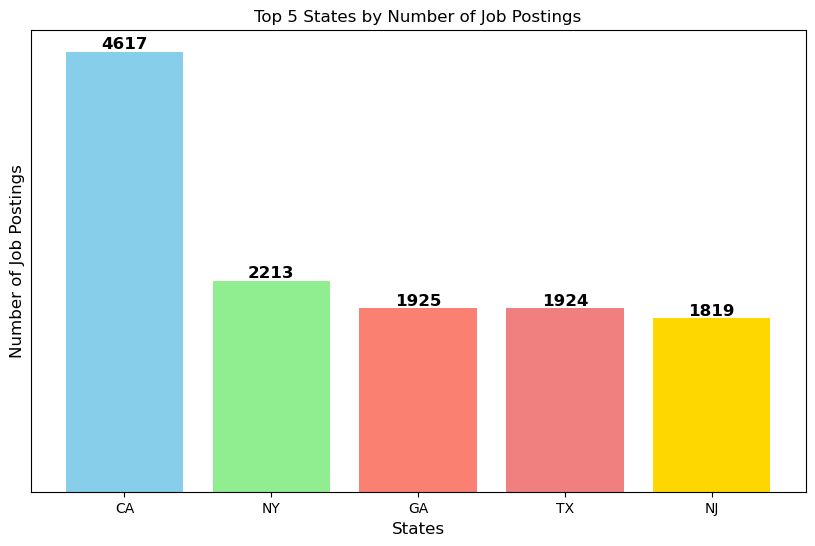

In [56]:
import matplotlib.pyplot as plt

top_states = data_cleaned['state'].value_counts().nlargest(5)

colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold']
plt.figure(figsize=(10,6))
bars = plt.bar(top_states.index, top_states.values, color=colors)

plt.xlabel('States', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.title('Top 5 States by Number of Job Postings', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.yticks([])

plt.show()


In [59]:
city_job_counts = data_cleaned['city'].value_counts()

top_7_cities = city_job_counts.head(7)

print(top_7_cities)

city
New York         1372
Atlanta          1245
San Francisco     889
Seattle           661
Boston            608
Houston           536
San Jose          452
Name: count, dtype: int64


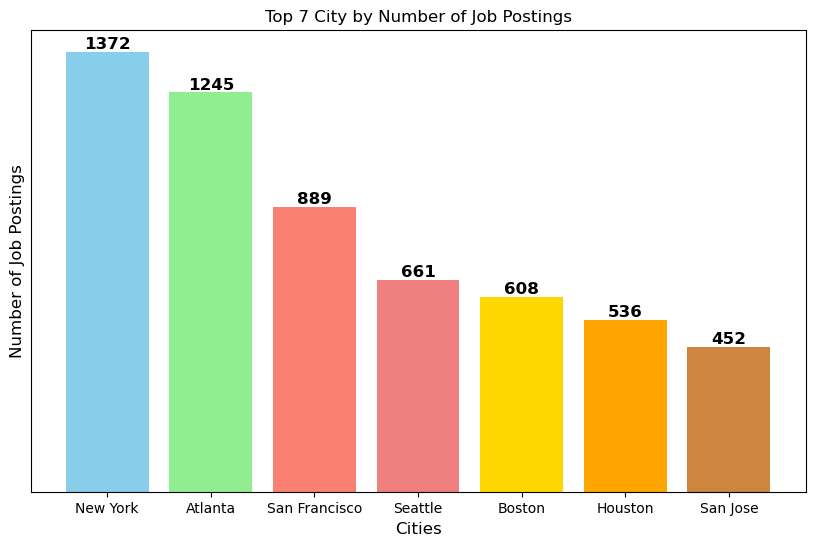

In [67]:
import matplotlib.pyplot as plt

top_cities = data_cleaned['city'].value_counts().nlargest(7)

colors = ['skyblue', 'lightgreen', 'salmon', 'lightcoral', 'gold', 'orange', 'peru']
plt.figure(figsize=(10,6))
bars = plt.bar(top_cities.index, top_cities.values, color=colors)

plt.xlabel('Cities', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.title('Top 7 City by Number of Job Postings', fontsize=12)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.yticks([])

plt.show()

In [ ]:
Find the Top skills Needed in the present Market 
Find If there is any relationship between City, State, Job Title 